In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Confirmed daily']]
data.columns = ['ds', 'y']

# Modeling

### Model creation

In [4]:
model_args = {
    'seasonality_mode': 'additive', 
    'changepoint_prior_scale': 0.95,
    'weekly_seasonality': 6,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [5]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = model.make_future_dataframe(periods = 1)
forecast = model.predict(future)

In [7]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
71,2020-06-16,407.0,377.270954,281.679932,467.142506
72,2020-06-17,506.0,366.102756,272.596115,460.270110
73,2020-06-18,314.0,343.864551,256.436585,438.207203
74,2020-06-19,352.0,358.408495,256.367970,455.201357
75,2020-06-20,309.0,341.864062,244.788706,437.279558
76,2020-06-21,311.0,334.046888,240.479592,425.623569
77,2020-06-22,296.0,314.818724,225.246132,409.393446
78,2020-06-23,300.0,329.567093,242.417531,425.658052
79,2020-06-24,294.0,318.398895,223.709949,407.407751
80,2020-06-25,NaN,296.160690,208.449137,399.810225


### Model explanation

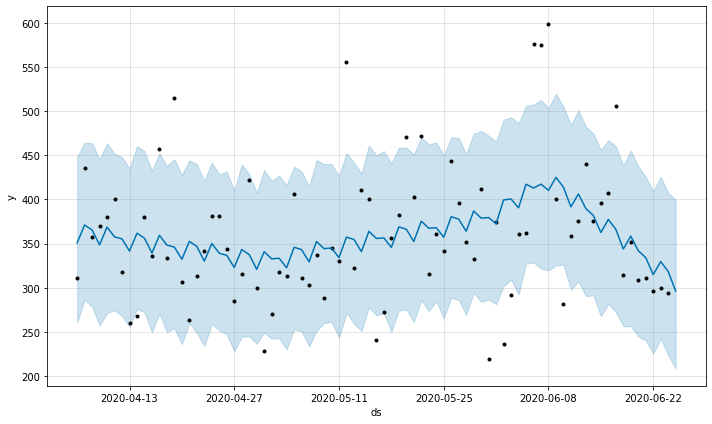

In [8]:
fig = model.plot(forecast)

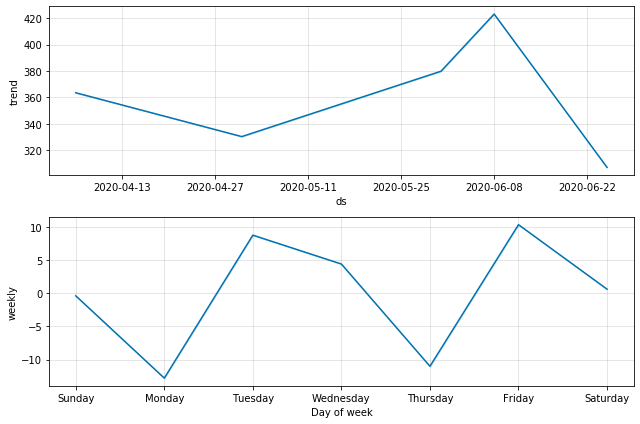

In [9]:
fig = model.plot_components(forecast)

### Model performance

In [10]:
results = cross_validation(model, initial = '69 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-06-14 00:00:00 and 2020-06-23 00:00:00


In [11]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-15,402.753655,301.843306,499.205420,396.0,2020-06-14
1,2020-06-16,425.901555,327.898062,522.456161,407.0,2020-06-15
2,2020-06-17,407.805795,313.499065,504.455957,506.0,2020-06-16
3,2020-06-18,425.821595,336.840037,526.986263,314.0,2020-06-17
4,2020-06-19,428.449917,337.220789,522.342591,352.0,2020-06-18
5,2020-06-20,416.600159,315.490752,502.482194,309.0,2020-06-19
6,2020-06-21,404.636540,310.431600,497.915952,311.0,2020-06-20
7,2020-06-22,367.517723,269.553794,460.891905,296.0,2020-06-21
8,2020-06-23,365.625798,271.395232,464.932563,300.0,2020-06-22
9,2020-06-24,331.572777,236.130695,425.065969,294.0,2020-06-23


In [12]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,5957.248102,77.183211,68.807392,0.206833,0.21797,0.7


### Tomorrow prediction

In [13]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

296